In [423]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [424]:
nomenclature = pd.read_csv("./data/nomenclature_2024.csv")
#trips = pd.read_csv("./data/mibici_2014-2024.csv")

college = pd.read_csv("./data/logan/LOGANFINAL/college.csv")
clothing = pd.read_csv("./data/logan/LOGANFINAL/clothing_stores.csv")
school0 = pd.read_csv("./data/logan/LOGANFINAL/school.csv")
school1 = pd.read_csv("./data/logan/LOGANFINAL/school1.csv")
school2 = pd.read_csv("./data/logan/LOGANFINAL/school2.csv")
school3 = pd.read_csv("./data/logan/LOGANFINAL/school3.csv")
grocery0 = pd.read_csv("./data/logan/LOGANFINAL/grocery_store.csv")
grocery1 = pd.read_csv("./data/logan/LOGANFINAL/grocery_store1.csv")

loganlist = list([college0, clothing0, school0, school1, school2, school3, grocery0, grocery1])

colegio0 = pd.read_csv("./data/guadalajara/guadaFR/colegio.csv")
colegio1 = pd.read_csv("./data/guadalajara/guadaFR/colegio1.csv")
colegio2 = pd.read_csv("./data/guadalajara/guadaFR/colegio2.csv")
colegio3 = pd.read_csv("./data/guadalajara/guadaFR/colegio3.csv")
colegio4 = pd.read_csv("./data/guadalajara/guadaFR/colegio4.csv")
escuela0 = pd.read_csv("./data/guadalajara/guadaFR/escuela.csv")
escuela1 = pd.read_csv("./data/guadalajara/guadaFR/escuela1.csv")
escuela2 = pd.read_csv("./data/guadalajara/guadaFR/escuela2.csv")
escuela3 = pd.read_csv("./data/guadalajara/guadaFR/escuela3.csv")
escuela4 = pd.read_csv("./data/guadalajara/guadaFR/escuela4.csv")
escuela5 = pd.read_csv("./data/guadalajara/guadaFR/escuela5.csv")
escuela6 = pd.read_csv("./data/guadalajara/guadaFR/escuela6.csv")
super0 = pd.read_csv("./data/guadalajara/guadaFR/supermercado.csv")
tienda0 = pd.read_csv("./data/guadalajara/guadaFR/tienda.csv")
tienda1 = pd.read_csv("./data/guadalajara/guadaFR/tienda1.csv")
tienda2 = pd.read_csv("./data/guadalajara/guadaFR/tienda2.csv")
tienda3 = pd.read_csv("./data/guadalajara/guadaFR/tienda3.csv")
tienda4 = pd.read_csv("./data/guadalajara/guadaFR/tienda4.csv")
tienda5 = pd.read_csv("./data/guadalajara/guadaFR/tienda5.csv")
tienda6 = pd.read_csv("./data/guadalajara/guadaFR/tienda6.csv")
tienda7 = pd.read_csv("./data/guadalajara/guadaFR/tienda7.csv")
universidad0 = pd.read_csv("./data/guadalajara/guadaFR/universidad.csv")
universidad1 = pd.read_csv("./data/guadalajara/guadaFR/universidad1.csv")
universidad2 = pd.read_csv("./data/guadalajara/guadaFR/universidad2.csv")
universidad3 = pd.read_csv("./data/guadalajara/guadaFR/universidad3.csv")
universidad4 = pd.read_csv("./data/guadalajara/guadaFR/universidad4.csv")
universidad5 = pd.read_csv("./data/guadalajara/guadaFR/universidad5.csv")
universidad6 = pd.read_csv("./data/guadalajara/guadaFR/universidad6.csv")
universidad7 = pd.read_csv("./data/guadalajara/guadaFR/universidad7.csv")

guadalist = list([colegio0, colegio1, colegio2, colegio3, colegio4, escuela0,
 escuela1, escuela2, escuela3, escuela4, escuela5, escuela6, super0, tienda0,
  tienda1, tienda2, tienda3, tienda4, tienda5, tienda6, tienda7, universidad0,
   universidad1, universidad2, universidad3, universidad4, universidad5,
    universidad6, universidad7])

In [425]:
from shapely.geometry import Point
import geopandas as gp

### Preprocessing

Establishing GeoDataFrames:

In [426]:
geomnom = [Point(xy) for xy in zip(nomenclature.longitude, nomenclature.latitude)]
nomenclature_geo = gp.GeoDataFrame(nomenclature.drop(columns={"longitude", "latitude"}), geometry=geomnom, crs="EPSG:4326")

For each station ID, we want to find the distance to the nearest geographic feature of each type (food, school, store, etc.). This will hopefully let us predict the popularity of each station.

In [427]:
schools = pd.concat([school0, school1, school2, school3])
groceries = pd.concat([grocery0, grocery1])

colegios = pd.concat([colegio0, colegio1, colegio2, colegio3, colegio4, universidad0, universidad1, universidad2, universidad3, universidad4, universidad5, universidad6, universidad7])
grocerias = pd.concat([tienda0, tienda1, tienda2, tienda3, tienda4, tienda5, tienda6, tienda7])
escuelas = pd.concat([escuela1, escuela2, escuela3, escuela4, escuela5, escuela6])

In [428]:
college["type"] = "college"
schools["type"] = "school"
groceries["type"] = "groceries"

colegios["type"] = "college"
escuelas["type"] = "school"
grocerias["type"] = "groceries"

In [429]:
LOGAN = pd.concat([college, groceries, schools]).drop(columns= {"description", "placepageUri"})
GUADA = pd.concat([colegios, grocerias, escuelas]).drop(columns= {"description", "placepageUri"})

### A bit of cleaning

In [430]:
logan_geo = [Point(xy) for xy in zip(LOGAN.X, LOGAN.Y)]
guada_geo = [Point(xy) for xy in zip(GUADA.X, GUADA.Y)]

LOGAN_GDF = gp.GeoDataFrame(LOGAN.drop(columns={"X", "Y"}), geometry=logan_geo, crs="EPSG:4326")
GUADA_GDF = gp.GeoDataFrame(GUADA.drop(columns={"X", "Y"}), geometry=guada_geo, crs="EPSG:4326")

In [431]:
GUADA_GDF.head()

,Name,type,geometry
0,Colegio Los Altos,college,POINT (-103.40752 20.68410)
1,COLLEGE OF COUNTRY LICEO,college,POINT (-103.37015 20.71024)
2,Colegio Real Guadalajara,college,POINT (-103.36467 20.62778)
3,Lopez de Legazpi school A.C.,college,POINT (-103.37905 20.63943)
4,"Colegio Finlandés campus López Mateos, Tlajomulco",college,POINT (-103.44976 20.57720)


### Preparing station dataset

In [432]:
nomenclature_geo = nomenclature_geo.drop(columns={"obcn", "location", "status"})

In [433]:
nomenclature_geo.head()

,id,name,geometry
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,POINT (-103.34882 20.66638)
1,3,(GDL-002) C. Colonias / Av. Niños héroes,POINT (-103.36600 20.66723)
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,POINT (-103.36825 20.66769)
3,5,(GDL-004) C. Ghilardi /C. Miraflores,POINT (-103.36255 20.69175)
4,6,(GDL-005) C. San Diego /Calzada Independencia,POINT (-103.33936 20.68116)


### Getting station popularity scores

In [434]:
trips = pd.read_csv("./data/mibici_2014-2024.csv")

In [435]:
trips.head()

,Unnamed: 0,Trip_Id,User_Id,Sex,Birth_year,Trip_start,Trip_end,Origin_Id,Destination_Id,Age,Duration
0,0,32244893,1470734,M,1981,2024-01-31 23:59:33,2024-02-01 00:11:15,24,86,43,0 days 00:11:42
1,1,32244892,2731702,M,1994,2024-01-31 23:59:06,2024-02-01 00:10:49,48,279,30,0 days 00:11:43
2,2,32244891,1431452,M,2001,2024-01-31 23:58:48,2024-02-01 00:01:42,273,383,23,0 days 00:02:54
3,3,32244890,2312602,F,2003,2024-01-31 23:58:44,2024-02-01 00:01:58,273,383,21,0 days 00:03:14
4,4,32244889,2266427,M,1999,2024-01-31 23:58:44,2024-02-01 00:01:39,273,383,25,0 days 00:02:55


In [436]:
frompop = trips.value_counts(subset=["Origin_Id"]).rename_axis("Id")
topop = trips.value_counts(subset=["Destination_Id"]).rename_axis("Id")
frompop.index.name = "Id"
topop.index.name = "Id"

In [437]:
frompop.head()

Id
51    564459
50    420088
11    409269
52    393887
35    356081
Name: count, dtype: int64

In [438]:
topop.head()

Id
51    744406
50    443538
35    395293
52    389553
54    386861
Name: count, dtype: int64

Apparently, some stations are more popular as destinations than origins, and vice versa. For our popularity score, we will average the origin and destination popularity and normalize.

In [439]:
poptotal = frompop.add(topop, fill_value=0)

In [440]:
poptotal.head()

Id
2     279824
3     213503
4     297708
5     191627
6     182698
Name: count, dtype: int64

In [441]:
popscore = (poptotal-poptotal.min())/(poptotal.max()-poptotal.min())

In [442]:
popscore.head()

Id
2     0.213767
3     0.163095
4     0.227431
5     0.146381
6     0.139559
Name: count, dtype: float64

In [443]:
popscore.head(8)

Id
2     0.213767
3     0.163095
4     0.227431
5     0.146381
6     0.139559
8     0.111103
9     0.207952
10    0.176835
Name: count, dtype: float64

In [444]:
from scipy.spatial import cKDTree
def ckdnearest(gdA, gdB): # Adapted from: https://gis.stackexchange.com/questions/222315/finding-nearest-point-in-other-geodataframe-using-geopandas

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist, name='dist')
        ], 
        axis=1)

    return gdf

In [445]:
guada_nearest_school = ckdnearest(nomenclature_geo, GUADA_GDF[GUADA_GDF["type"] == "school"])
guada_nearest_college = ckdnearest(nomenclature_geo, GUADA_GDF[GUADA_GDF["type"] == "college"])
guada_nearest_grocery = ckdnearest(nomenclature_geo, GUADA_GDF[GUADA_GDF["type"] == "groceries"])

# logan_nearest_school = ckdnearest(???, LOGAN_GDF[LOGAN_GDF["type"] == "school"])
# logan_nearest_college = ckdnearest(???, LOGAN_GDF[LOGAN_GDF["type"] == "college"])
# logan_nearest_grocery = ckdnearest(???, LOGAN_GDF[LOGAN_GDF["type"] == "groceries"])


In [446]:
guada_nearest_school.head(8)

,id,name,geometry,Name,type,dist
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,POINT (-103.34882 20.66638),Escuela Urbana 39 Benito Juárez,school,0.015914
1,3,(GDL-002) C. Colonias / Av. Niños héroes,POINT (-103.36600 20.66723),Escuela Urbana 39 Benito Juárez,school,0.013081
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,POINT (-103.36825 20.66769),Escuela Urbana 39 Benito Juárez,school,0.014584
3,5,(GDL-004) C. Ghilardi /C. Miraflores,POINT (-103.36255 20.69175),Escuela Secundaria Técnica # 4,school,0.008654
4,6,(GDL-005) C. San Diego /Calzada Independencia,POINT (-103.33936 20.68116),Escuela PriMaría Urbana Luis Pérez,school,0.013344
5,8,(GDL-006) C. Venustiano Carranza /C. Reforma,POINT (-103.34441 20.68072),Escuela PriMaría Urbana Luis Pérez,school,0.017254
6,9,(GDL-007) C. Epigmenio Glez./Av. Cristobal C.,POINT (-103.35056 20.66677),Escuela Urbana 39 Benito Juárez,school,0.014994
7,10,(GDL-008) C. J. Angulo / C. González Ortega,POINT (-103.35040 20.68187),Escuela PriMaría Urbana Luis Pérez,school,0.021695


### Assemble X, y DataFrames

In [447]:
print(popscore[popscore == 0])
print(nomenclature_geo[nomenclature_geo.id == 124]) # No idea why this is here...

Id 
124    0.0
Name: count, dtype: float64
Empty GeoDataFrame
Columns: [id, name, geometry]
Index: []


In [448]:
popscore = popscore.drop(labels=124)

In [449]:
print(popscore.size)
print(nomenclature_geo["geometry"].size)

372
372


In [450]:
print(nomenclature_geo[nomenclature_geo.id == 124])

Empty GeoDataFrame
Columns: [id, name, geometry]
Index: []


In [451]:
popscore = popscore.reset_index().rename(columns={"count" : "score"})

In [452]:
popscore.head()

,Id,score
0,2,0.213767
1,3,0.163095
2,4,0.227431
3,5,0.146381
4,6,0.139559


In [453]:
guada_df = nomenclature_geo
guada_df.insert(loc=3, column="schooldist", value=guada_nearest_school["dist"])
guada_df.insert(loc=4, column= "collegedist", value=guada_nearest_college["dist"])
guada_df.insert(loc=5, column= "grocerydist", value=guada_nearest_grocery["dist"])
guada_df.insert(loc=6, column= "score", value=popscore["score"])

In [454]:
guada_df.head()

,id,name,geometry,schooldist,collegedist,grocerydist,score
0,2,(GDL-001) C. Epigmenio Glez./ Av. 16 de Sept.,POINT (-103.34882 20.66638),0.015914,0.006273,0.003158,0.213767
1,3,(GDL-002) C. Colonias / Av. Niños héroes,POINT (-103.36600 20.66723),0.013081,0.003968,0.006840,0.163095
2,4,(GDL-003) C. Vidrio / Av. Chapultepec,POINT (-103.36825 20.66769),0.014584,0.003131,0.009137,0.227431
3,5,(GDL-004) C. Ghilardi /C. Miraflores,POINT (-103.36255 20.69175),0.008654,0.008443,0.008620,0.146381
4,6,(GDL-005) C. San Diego /Calzada Independencia,POINT (-103.33936 20.68116),0.013344,0.007035,0.009834,0.139559


In [553]:
guada_df[guada_df["score"] > 0.5].head(10)

,id,name,geometry,schooldist,collegedist,grocerydist,score
8,11,(GDL-009) Calz. Federalismo/ C. J. Angulo,POINT (-103.35384 20.68208),0.020569,0.003721,0.010797,0.602014
32,35,(GDL-033) Av. Hidalgo / C. Pedro Loza,POINT (-103.34798 20.67742),0.022104,0.001998,0.005622,0.574052
47,50,(GDL-048) C. Constancio Hernández/ Av. Juaréz,POINT (-103.35855 20.67472),0.019383,0.001092,0.002111,0.659818
48,51,(GDL-049) Lopez Cotilla/ Marcos Castellanos,POINT (-103.35632 20.67409),0.019096,0.002517,0.003852,1.000000
49,52,(GDL-050) C. Pedro Moreno / Calz. Federalismo,POINT (-103.35458 20.67575),0.021130,0.000117,0.006035,0.598552
51,54,(GDL-052) Av. Juárez / Av. 16 de Septiembre,POINT (-103.34789 20.67524),0.023419,0.000370,0.003617,0.565555


In [455]:
#guada_df.to_csv("./data/guada_df.csv")

## Analysis of Guadalajara (finally)

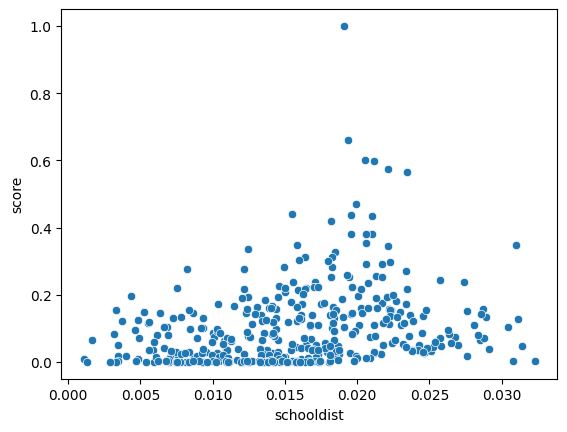

In [456]:
sns.scatterplot(data=guada_df, x="schooldist", y="score")
plt.show()

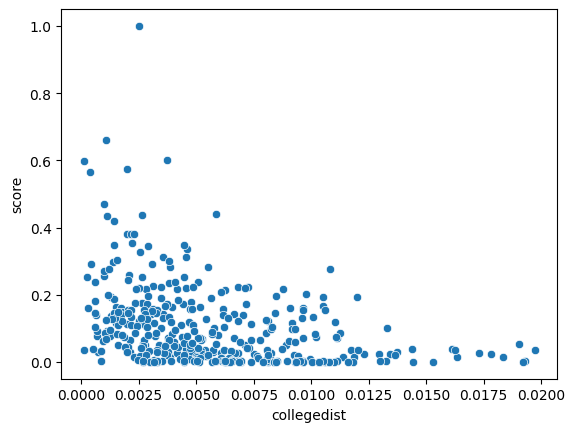

In [457]:
sns.scatterplot(data=guada_df, x="collegedist", y="score")
plt.show()

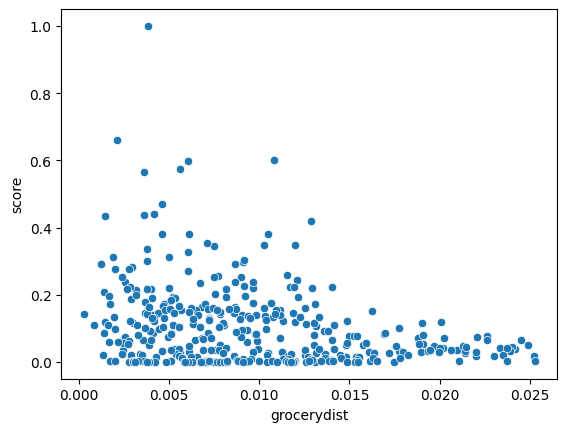

In [458]:
sns.scatterplot(data=guada_df, x="grocerydist", y="score")
plt.show()

The scatterplots show us that a station's popularity has a negative (possibly inverse?) relationship with distance from the nearest college and the nearest grocery store. Interestingly, it displays a *positive* relationship with distance to the nearest "school". This could be partially explained by the fact that users of the service must be at least 16 years old, and if a school that a 16-or-under attends is nearby then it takes the place of another building that could attract potential users. This is purely speculative, however.

No relationship here seems very strong. It should be noted that these data points are *extremely* dirty and inaccurate; we didn't have the time or resources to actually find every instance of each school, college building, or grocery store in Guadalajara, and there are certainly types of geographical features that we did not account for, such as nearby major highways, stops for other types of public transportation, or worksites that are not easily searched for. 

In [546]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit
from sklearn.metrics import precision_recall_fscore_support
train, test = train_test_split(guada_df.drop(columns={"id", "name", "geometry"}), test_size=0.15, random_state=1248)

In [464]:
X_train = train.drop(columns={"score"})
y_train = train["score"]
X_test = test.drop(columns={"score"})
y_test = test["score"]

Since we're working with somewhat few data points, cross-validation is a good step to take here.

In [500]:
model0 = LinearRegression(n_jobs=10)
scores = cross_validate(model0, X=X_train, y=y_train, scoring="r2", cv=10)

In [501]:
print(scores["test_score"])

[ 0.40543097  0.38009395  0.38835385  0.20476087  0.29927697  0.3828216
  0.24577778 -0.50826821  0.34062857  0.21579896]


In [502]:
print(scores["test_score"].mean())

0.23546753142387106


A decent level of variance is expected with so few data points, but an r2 score of -0.51 is troubling... Will standardization and penalties help?

In [503]:
guada_num = guada_df.drop(columns={"id", "name", "geometry"})
guada_std = (guada_num - guada_num.mean())/guada_num.std()

In [504]:
train, test = train_test_split(guada_df.drop(columns={"id", "name", "geometry"}), test_size=0.15, random_state=1248)
X_train = train.drop(columns={"score"})
y_train = train["score"]
X_test = test.drop(columns={"score"})
y_test = test["score"]

In [505]:
from sklearn.linear_model import Ridge, ElasticNet, Lasso

In [506]:
ridgemodel = Ridge()
elasticmodel = ElasticNet()
lassomodel = Lasso()

models = list([model0, ridgemodel, elasticmodel, lassomodel])

In [507]:
for model in models:
    scores0 = cross_validate(model, X=X_train, y=y_train, scoring="r2", cv=10)
    print(scores0["test_score"].mean())

0.23546753142387106
-0.04662203588205629
-0.05222784669067051
-0.05222784669067051


Nope, there's no saving this dataset. But maybe our method here is incorrect...

## Wait, this is a classification task...

Predicting "linear popularity" doesn't not make sense, but it might make more sense to predict whether a station will fall above or below a certain threshhold of popularity. 

In [509]:
guada_num["super_popular"] = (guada_num["score"] >= 0.2)

In [510]:
guada_class = guada_num.drop(columns={"score"})

In [517]:
guada_class.head()

,schooldist,collegedist,grocerydist,super_popular
0,0.015914,0.006273,0.003158,True
1,0.013081,0.003968,0.006840,False
2,0.014584,0.003131,0.009137,True
3,0.008654,0.008443,0.008620,False
4,0.013344,0.007035,0.009834,False


In [511]:
X_class = guada_class.drop(columns={"super_popular"})
y_class = guada_class["super_popular"]

In [512]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [514]:
logimodel = LogisticRegression(random_state=1248)
svmmodel = SVC(random_state=1248)

classmodels = list([logimodel, svmmodel])

In [519]:
for model in classmodels:
    scores = cross_validate(model, X=X_class, y=y_class, cv=10)
    print(scores["test_score"])

[0.84210526 0.84210526 0.83783784 0.83783784 0.83783784 0.83783784
 0.83783784 0.86486486 0.86486486 0.86486486]
[0.47368421 0.84210526 0.83783784 0.83783784 0.83783784 0.83783784
 0.83783784 0.86486486 0.86486486 0.86486486]


In [550]:
logimodel1 = LogisticRegression(random_state=1983)
classtrain, classtest = train_test_split(guada_class, test_size=0.2, random_state=123)
yc_train = classtrain["super_popular"]
Xc_test = classtest.drop(columns={"super_popular"})
yc_test = classtest["super_popular"]

In [551]:
logimodel1.fit(Xc_train, yc_train)
print(logimodel1.score(Xc_test, yc_test))
yc_pred = logimodel1.predict(Xc_test)
print(precision_recall_fscore_support(yc_test, yc_pred))

0.7866666666666666
(array([0.78666667, 0.        ]), array([1., 0.]), array([0.88059701, 0.        ]), array([59, 16], dtype=int64))


c:\Users\Nate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
